In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical

In [0]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    print(X.shape)
    print(t.shape)
    return X, t

In [0]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t = []
    for i in range(len(t_indices)):
        temp = [0.0 for j in range(N)]
        temp[t_indices[i]] = 1.0
        t.append(np.array(temp))
    t_1hot = np.array(t)
    return t_1hot

In [0]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [0]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train = X
    t_train = t
    test = np.int_(testFraction*(np.size(X,0)))
    ntest = np.sort(np.array(np.random.choice(np.size(X,0)-1, test, replace=False)))
    X_test = []
    t_test = []
    for i in range(len(ntest)):
        X_test.append(X_train[ntest[i]-i])
        t_test.append(t_train[ntest[i]-i])
        t_train = np.delete(t_train,ntest[i]-i,0)
        X_train = np.delete(X_train,ntest[i]-i,0)
    t_test = np.array(t_test)
    X_test = np.array(X_test)
    return X_train, t_train, X_test, t_test

In [0]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [0]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train_normalized = (X_train - np.mean(X_train, axis = 0))/(np.std(X_train,axis = 0))
    X_test_normalized = (X_test - np.mean(X_train, axis = 0))/(np.std(X_train,axis = 0))
    return X_train_normalized, X_test_normalized

In [0]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [0]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = 1/(1 + np.exp(-x))
    return y

In [0]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [0]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = (np.exp(x))/(np.sum(np.exp(x)))
    return y

In [0]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [0]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = (x)*(1-x)
    return y

In [0]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    CM = np.zeros((3,3))
    for i in range(len(t)):
        CM[t[i],np.argmax(y[i])]+=1
    accuracy = ((np.sum(np.diagonal(CM)))/(np.sum(CM)))*100
    print("Accuracy = ",accuracy)
    print("In confusion matrix, rows correspond to actual values and columns to predicted values")
    print(CM)
    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

(150, 4)
(150,)


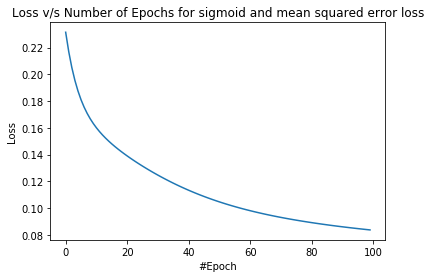

Accuracy =  93.33333333333333
In confusion matrix, rows correspond to actual values and columns to predicted values
[[11.  0.  0.]
 [ 0.  7.  2.]
 [ 0.  0. 10.]]


In [78]:
def experiment_sigmoid():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,t = loadIrisData()
    X_train, t_train, X_test, t_test = splitData(X,t,0.2)
    t_train_one_hot = one_hot_encoding(t_train,4)
    X_train,X_test = normalizeX(X_train, X_test)
    model = Sequential()
    model.add(Dense(8, activation='sigmoid', input_dim=4))
    model.add(Dense(4, activation='sigmoid'))
    sgd = SGD(lr=0.01)
    model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])
    loss = model.fit(X_train, t_train_one_hot,
          epochs=100, verbose=0,
          batch_size=1)
    plt.plot(loss.history['loss'])
    plt.title('Loss v/s Number of Epochs for sigmoid and mean squared error loss')
    plt.ylabel('Loss')
    plt.xlabel('#Epoch')
    plt.show()
    predicted_data = model.predict(X_test)
    getCM(predicted_data, t_test)
    
if __name__=="__main__":
    experiment_sigmoid()

(150, 4)
(150,)


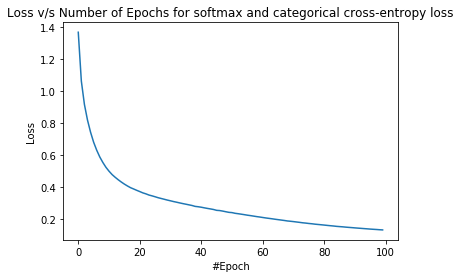

Accuracy =  96.66666666666667
In confusion matrix, rows correspond to actual values and columns to predicted values
[[ 9.  0.  0.]
 [ 0. 11.  1.]
 [ 0.  0.  9.]]


In [79]:
def experiment_softmax():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,t = loadIrisData()
    X_train, t_train, X_test, t_test = splitData(X,t,0.2)
    t_train_one_hot = one_hot_encoding(t_train,4)
    X_train,X_test = normalizeX(X_train, X_test)
    model = Sequential()
    model.add(Dense(8, activation='sigmoid', input_dim=4))
    model.add(Dense(4, activation='softmax'))
    sgd = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
    loss = model.fit(X_train, t_train_one_hot,
          epochs=100, verbose=0,
          batch_size=1)
    plt.plot(loss.history['loss'])
    plt.title('Loss v/s Number of Epochs for softmax and categorical cross-entropy loss')
    plt.ylabel('Loss')
    plt.xlabel('#Epoch')
    plt.show()
    predicted_data = model.predict(X_test)
    getCM(predicted_data, t_test)
    
if __name__=="__main__":
    experiment_softmax()